In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

In [5]:
cutoff = 150
xvals = []
totalList = []
for p in range(1,21):
    q = 20
    gcdVal = gcd(p,q)
    p = p // gcdVal
    q = q // gcdVal
    hist = np.load('rawData/data_'+str(p)+'_'+str(q)+'.npy')
    pruned_hist = [i for i in hist if abs(i) < cutoff]
    xvals = xvals + [(p+0.0)/q for i in range(len(pruned_hist))]
    totalList = totalList + pruned_hist

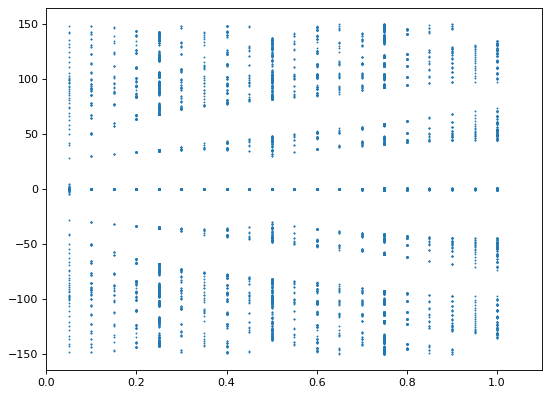

In [6]:
from matplotlib.pyplot import figure


fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvals,totalList,s=0.5,alpha=1.0)

plt.xlim(-0.0,1.1)
fig.savefig('histogram_TBG_20_steps.pdf')

(-0.0, 1.1)

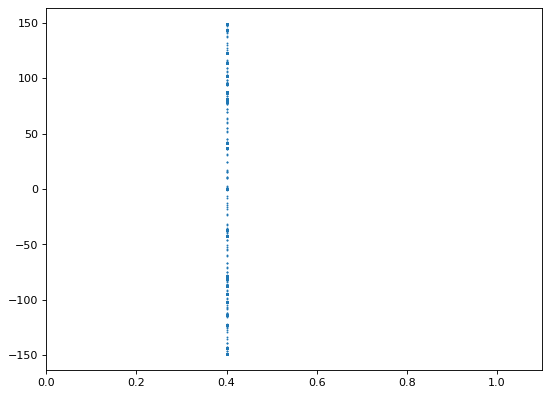

In [27]:
cutoff = 150
xvals = []
totalList = []
p=2
q = 5
gcdVal = gcd(p,q)
p = p // gcdVal
q = q // gcdVal
hist = np.load('rawData/data_'+str(p)+'_'+str(q)+'.npy')
pruned_hist = [i for i in hist if abs(i) < cutoff]
xvals = xvals + [(p+0.0)/q for i in range(len(pruned_hist))]
totalList = totalList + pruned_hist

from matplotlib.pyplot import figure


fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvals,totalList,s=0.5,alpha=1.0)

plt.xlim(-0.0,1.1)